In [1]:
import pandas as pd
from pandas import DataFrame
from typing import Dict, Literal
import os
trainDF = pd.read_csv('train_V2.csv')
testDF = pd.read_csv('test_V2.csv')
trainDF.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [2]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [3]:
trainDF.shape

(4446966, 29)

In [ ]:
trainDF.dropna(inplace=True)
print(trainDF.shape)
trainDF.drop(['Id'],axis=1,inplace=True)
print(trainDF.shape)

(4446965, 29)
(4446965, 25)


In [5]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4446965 entries, 0 to 4446965
Data columns (total 25 columns):
 #   Column           Dtype  
---  ------           -----  
 0   groupId          object 
 1   matchId          object 
 2   assists          int64  
 3   boosts           int64  
 4   damageDealt      float64
 5   DBNOs            int64  
 6   headshotKills    int64  
 7   heals            int64  
 8   killPlace        int64  
 9   kills            int64  
 10  killStreaks      int64  
 11  longestKill      float64
 12  matchDuration    int64  
 13  matchType        object 
 14  maxPlace         int64  
 15  numGroups        int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPlacePerc     float64
dtypes: float64(6), int64(16), object(3)
memory usage: 882.1+ MB


# Group the data and save it to file

In [6]:
def dataframes_from_id_type(id_type: str, df: DataFrame, df_type: Literal["train", "test"]) -> DataFrame:
    match id_type:
        case "matchId":
            path = "./data_groped_by_{}/{}".format(id_type,df_type)
            if not(os.path.exists(path)):
                os.makedirs(path)
            match_id_list = []
            match_id_list = df.groupby('matchId').agg(list)
            for i in range(match_id_list.shape[0]):
                series = match_id_list.iloc[i]
                if not(os.path.exists("{}/{}".format(path, series.matchType[0]))):
                    os.makedirs("{}/{}".format(path, series.matchType[0]))
                filename = "{}/{}/{}.csv".format(path,series.matchType[0],series.name)
                series.to_csv(filename)
            return match_id_list
        case "groupId":
            return []
    return []

In [7]:
x = dataframes_from_id_type(id_type="matchId", df=trainDF, df_type="train")

In [8]:
print(x.shape)
print(type(x))
print(x.iloc[47963])
print(len(x.iloc[20]['assists']))

(47964, 24)
<class 'pandas.core.frame.DataFrame'>
groupId            [14fdb6c222eff7, 1958cde581220c, 7b02f39a10095...
assists            [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...
boosts             [0, 2, 1, 0, 1, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, ...
damageDealt        [37.8, 39.1, 80.74, 0.0, 145.9, 79.0, 28.36, 1...
DBNOs              [0, 0, 0, 1, 1, 0, 0, 1, 4, 0, 1, 0, 1, 6, 0, ...
headshotKills      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...
heals              [0, 3, 1, 1, 1, 0, 0, 8, 1, 0, 0, 0, 3, 2, 0, ...
killPlace          [76, 39, 42, 57, 32, 53, 43, 16, 1, 77, 35, 61...
kills              [0, 0, 0, 0, 1, 0, 0, 2, 6, 0, 1, 0, 2, 5, 0, ...
killStreaks        [0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, ...
longestKill        [0.0, 0.0, 0.0, 0.0, 20.75, 0.0, 0.0, 21.09, 1...
matchDuration      [1863, 1863, 1863, 1863, 1863, 1863, 1863, 186...
matchType          [squad-fpp, squad-fpp, squad-fpp, squad-fpp, s...
maxPlace           [29, 29, 29, 29, 29, 29, 29, 29, 2

# Load data for later use

Total games of duo: 3356
Total games of duo-fpp: 10620
Total games of solo: 2297
Total games of solo-fpp: 5678
Total games of squad: 6658
Total games of squad-fpp: 18576
Total games of crashfpp: 73
Total games of crashtpp: 5
Total games of flarefpp: 9
Total games of flaretpp: 29
Total games of normal-duo: 12
Total games of normal-duo-fpp: 158
Total games of normal-solo: 23
Total games of normal-solo-fpp: 96
Total games of normal-squad: 16
Total games of normal-squad-fpp: 358


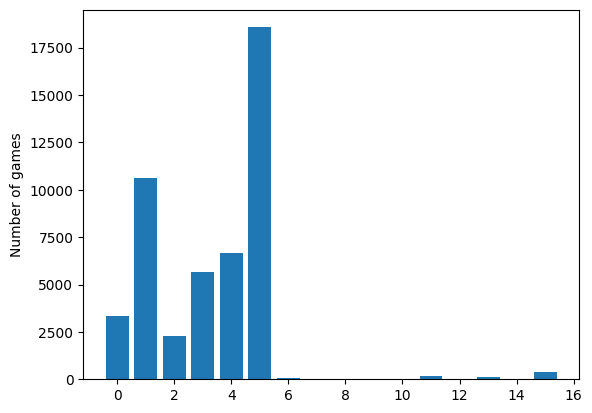

In [78]:
from copy import copy
from matplotlib import pyplot as plt
import numpy as np

data_grouped_by_game_standard = {
                        "duo": [],
                        "duo-fpp": [],
                        "solo": [],
                        "solo-fpp": [],
                        "squad": [],
                        "squad-fpp": []
                        }

data_grouped_by_game_alternative = {
                        "crashfpp": [],
                        "crashtpp": [],
                        "flarefpp": [],
                        "flaretpp": [],
                        "normal-duo": [],
                        "normal-duo-fpp": [],
                        "normal-solo": [],
                        "normal-solo-fpp": [],
                        "normal-squad": [],
                        "normal-squad-fpp": [],
                        }

data_grouped_by_game = {
                        "duo": [],
                        "duo-fpp": [],
                        "solo": [],
                        "solo-fpp": [],
                        "squad": [],
                        "squad-fpp": [],
                        "crashfpp": [],
                        "crashtpp": [],
                        "flarefpp": [],
                        "flaretpp": [],
                        "normal-duo": [],
                        "normal-duo-fpp": [],
                        "normal-solo": [],
                        "normal-solo-fpp": [],
                        "normal-squad": [],
                        "normal-squad-fpp": [],
                        }
data_to_retrieve = {
                "matchId": "",
                "matchDuration": 0,
                "numPlayers": 0,
                "numGroups": 0,
                "damageDealt": 0,
                "kills":0,
                "assists": 0,
                "boosts": 0,
                "heals": 0,
                "weaponsAcquired":0
                }


for i in range(x.shape[0]):
    game_data = x.iloc[i]
    data_holder = copy(data_to_retrieve)
    data_holder["matchId"] = game_data.name
    data_holder["matchDuration"] = game_data['matchDuration'][0]/60
    data_holder["numGroups"] = game_data["numGroups"][0]
    data_holder["numPlayers"] = len(game_data["assists"])
    data_holder["damageDealt"] = game_data["damageDealt"][0]
    data_holder["kills"] = game_data["kills"][0]
    data_holder["assists"] = game_data["assists"][0]
    data_holder["boosts"] = game_data["boosts"][0]
    data_holder["heals"] = game_data["heals"][0]
    data_holder["weaponsAcquired"] = game_data["weaponsAcquired"][0]
    data_grouped_by_game[game_data["matchType"][0]].append(data_holder)
    if game_data["matchType"][0] in data_grouped_by_game_standard.keys():
        data_grouped_by_game_standard[game_data["matchType"][0]].append(data_holder)
    else:
        data_grouped_by_game_alternative[game_data["matchType"][0]].append(data_holder)


def match_type_data_boxplot(grouped_data: Dict,
                            match_type: Literal["crashfpp", "crashtpp", "duo", "duo-fpp", "flarefpp", 
                                                "flaretpp", "normal-duo", "normal-duo-fpp", "normal-solo", "normal-solo-fpp",
                                                "normal-squad", "normal-squad-fpp", "solo", "solo-fpp", "squad", "squad-fpp"],
                            data_to_boxplot: Literal["matchDuration", "numPlayers", "numGroups"]) -> None:
    data = []
    for game in grouped_data[match_type]:
        if data_to_boxplot == "numPlayers":
            data.append(game[data_to_boxplot])
        else:
            retrieved_value = game[data_to_boxplot]
            if data_to_boxplot == "matchDuration":
                retrieved_value = retrieved_value / 60
            data.append(retrieved_value)
    plt.clf()
    ax = plt.subplot()

    rect = ax.boxplot(data)
    ax.legend([data_to_boxplot])
    if not(os.path.exists("./plots/train/boxplots/{}".format(match_type))):
        os.makedirs("./plots/train/boxplots/{}".format(match_type))
    plt.savefig("./plots/train/boxplots/{}/{}.png".format(match_type, data_to_boxplot))
    

def compute_avg_of_match_type(grouped_data: Dict) -> Dict:
    match_type_avgs = dict.fromkeys(grouped_data.keys(), [])
    for match_type in grouped_data:
        data_holder = copy(data_to_retrieve)
        n_of_matches = 0
        for game in grouped_data[match_type]:
            n_of_matches += 1
            for key in data_to_retrieve:
                if key != "matchId":
                    data_holder[key] += game[key]
        print("Averages of \"{}\" match type are:".format(match_type))
        for key in data_to_retrieve:
            if key != "matchId":
                data_holder[key] /= n_of_matches
                print("{}: {}".format(key, data_holder[key]))
        match_type_avgs[match_type] = data_holder
        print("-------------------------------------------------------------")
    return match_type_avgs

n_games = []
for gamemode in data_grouped_by_game:
    print("Total games of {}: {}".format(gamemode, len(data_grouped_by_game[gamemode])))
    n_games.append(len(data_grouped_by_game[gamemode]))

x_placeholders = np.arange(len(data_grouped_by_game.keys()))
ax = plt.subplot()
ax.bar(x=x_placeholders, height = n_games)
ax.set_ylabel('Number of games')
plt.savefig("./plots/number_of_games_per_gametype.png")

# Generate boxplots of a given feature and save it to file

In [ ]:
match_types = ["crashfpp", "crashtpp", "duo", "duo-fpp", "flarefpp", 
               "flaretpp", "normal-duo", "normal-duo-fpp", "normal-solo", "normal-solo-fpp",
               "normal-squad", "normal-squad-fpp", "solo", "solo-fpp", "squad", "squad-fpp"]
match_types_standard = ["duo", "duo-fpp", "solo", "solo-fpp", "squad", "squad-fpp"]
match_types_alternative = ["crashfpp", "crashtpp", "flarefpp", 
               "flaretpp", "normal-duo", "normal-duo-fpp", "normal-solo", "normal-solo-fpp",
               "normal-squad", "normal-squad-fpp"]
for type in match_types:
    match_type_data_boxplot(grouped_data = data_grouped_by_game, match_type=type, data_to_boxplot="numPlayers")

# Compute the averages for the bar plots

In [62]:
avgs = compute_avg_of_match_type(data_grouped_by_game)
avgs_standard = compute_avg_of_match_type(data_grouped_by_game_standard)
avgs_alt = compute_avg_of_match_type(data_grouped_by_game_alternative)

Averages of "duo" match type are:
matchDuration: 27.467654946364735
numPlayers: 93.44189511323003
numGroups: 45.38855780691299
damageDealt: 124.2002740464839
kills: 0.8974970202622169
assists: 0.21930870083432658
boosts: 1.16388557806913
heals: 1.3811084624553038
weaponsAcquired: 3.720202622169249
-------------------------------------------------------------
Averages of "duo-fpp" match type are:
matchDuration: 26.335990269930978
numPlayers: 93.85037664783428
numGroups: 45.80894538606403
damageDealt: 133.69386876647826
kills: 0.9313559322033899
assists: 0.21760828625235404
boosts: 1.1067796610169491
heals: 1.3612994350282486
weaponsAcquired: 3.5935028248587573
-------------------------------------------------------------
Averages of "solo" match type are:
matchDuration: 28.162030184298256
numPlayers: 79.20896821941663
numGroups: 73.39007400957772
damageDealt: 110.00216517196345
kills: 0.7335655202437963
assists: 0.05093600348280366
boosts: 0.9638659120592077
heals: 0.8554636482368306
we

# Data of both standard and alternative gamemodes

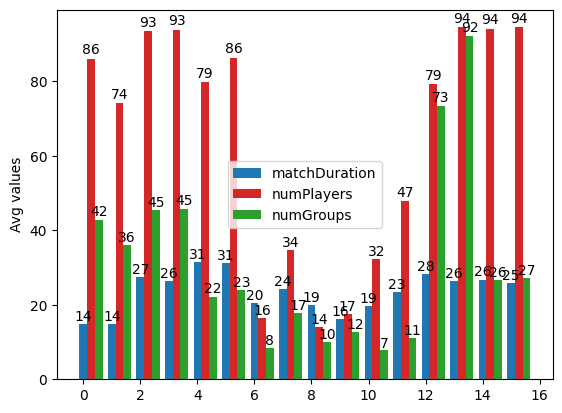

In [ ]:
import numpy as np

retrieved_data = {
                "matchId": "",
                "matchDuration": [],
                "numPlayers": [],
                "numGroups": [],
                "damageDealt": [],
                "kills":[],
                "assists": [],
                "boosts": [],
                "heals": [],
                "weaponsAcquired":[]
                }
keys = []
for key in avgs:
    game_data = avgs[key]
    for k in retrieved_data:
        if k != "matchId":
            retrieved_data[k].append(game_data[k])

x_placeholders = np.arange(len(match_types))
ax = plt.subplot()
width = 0.27

rect1 = ax.bar(x = x_placeholders, height = retrieved_data["matchDuration"], width=width, color = "#1f77b4", align="center")
rect2 = ax.bar(x = x_placeholders+width, height = retrieved_data["numPlayers"], width=width, color = "#d62728", align="center")
rect3 = ax.bar(x = x_placeholders+2*width, height = retrieved_data["numGroups"], width=width, color = "#2ca02c", align="center")

ax.set_ylabel('Avg values')

ax.legend( (rect1[0], rect2[0], rect3[0]), ('matchDuration', 'numPlayers', 'numGroups'), loc='center')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.savefig("./plots/avg_values_per_gametype.png")

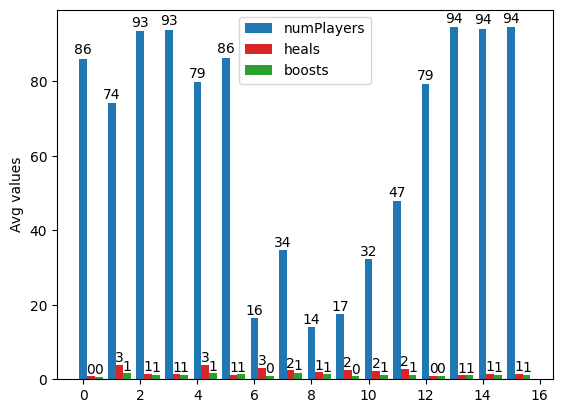

In [ ]:
ax = plt.subplot()
width = 0.27

rect1 = ax.bar(x = x_placeholders, height = retrieved_data["numPlayers"], width=width, color = "#1f77b4", align="center")
rect2 = ax.bar(x = x_placeholders+width, height = retrieved_data["heals"], width=width, color = "#d62728", align="center")
rect3 = ax.bar(x = x_placeholders+2*width, height = retrieved_data["boosts"], width=width, color = "#2ca02c", align="center")

ax.set_ylabel('Avg values')

ax.legend( (rect1[0], rect2[0], rect3[0]), ('numPlayers', 'heals', 'boosts'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.savefig("./plots/avg_values_per_gametype2.png")

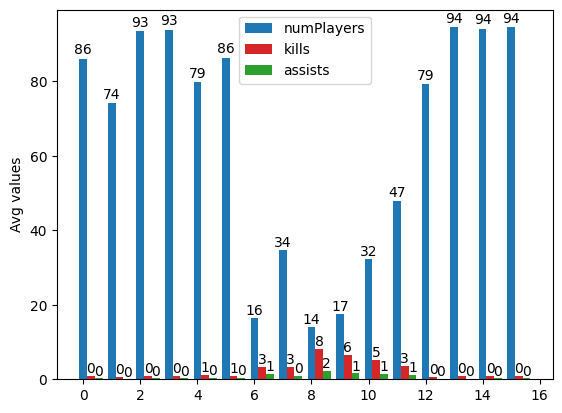

In [ ]:
ax = plt.subplot()
width = 0.27

rect1 = ax.bar(x = x_placeholders, height = retrieved_data["numPlayers"], width=width, color = "#1f77b4", align="center")
rect2 = ax.bar(x = x_placeholders+width, height = retrieved_data["kills"], width=width, color = "#d62728", align="center")
rect3 = ax.bar(x = x_placeholders+2*width, height = retrieved_data["assists"], width=width, color = "#2ca02c", align="center")

ax.set_ylabel('Avg values')

ax.legend( (rect1[0], rect2[0], rect3[0]), ('numPlayers', 'kills', 'assists'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.savefig("./plots/avg_values_per_gametype3.png")

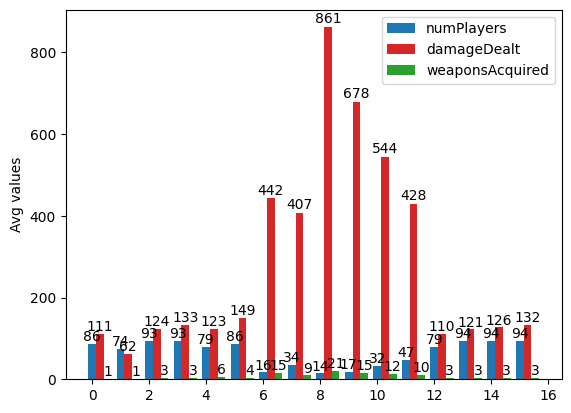

In [ ]:
ax = plt.subplot()
width = 0.27

rect1 = ax.bar(x = x_placeholders, height = retrieved_data["numPlayers"], width=width, color = "#1f77b4", align="center")
rect2 = ax.bar(x = x_placeholders+width, height = retrieved_data["damageDealt"], width=width, color = "#d62728", align="center")
rect3 = ax.bar(x = x_placeholders+2*width, height = retrieved_data["weaponsAcquired"], width=width, color = "#2ca02c", align="center")

ax.set_ylabel('Avg values')

ax.legend( (rect1[0], rect2[0], rect3[0]), ('numPlayers', 'damageDealt', 'weaponsAcquired'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.savefig("./plots/avg_values_per_gametype4.png")

# Data of standard game modes

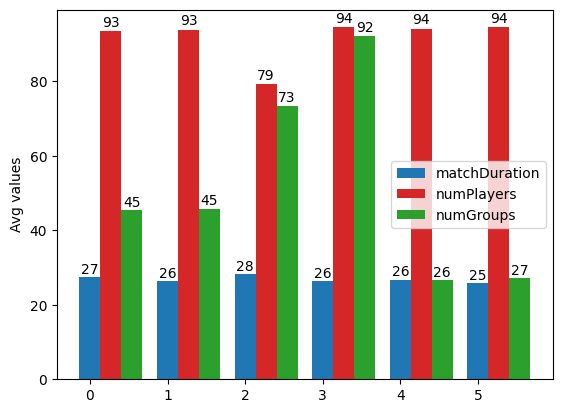

In [79]:
import numpy as np

retrieved_data = {
                "matchId": "",
                "matchDuration": [],
                "numPlayers": [],
                "numGroups": [],
                "damageDealt": [],
                "kills":[],
                "assists": [],
                "boosts": [],
                "heals": [],
                "weaponsAcquired":[]
                }
keys = []
for key in avgs_standard:
    game_data = avgs[key]
    for k in retrieved_data:
        if k != "matchId":
            retrieved_data[k].append(game_data[k])

x_placeholders = np.arange(len(match_types_standard))
ax = plt.subplot()
width = 0.27

rect1 = ax.bar(x = x_placeholders, height = retrieved_data["matchDuration"], width=width, color = "#1f77b4", align="center")
rect2 = ax.bar(x = x_placeholders+width, height = retrieved_data["numPlayers"], width=width, color = "#d62728", align="center")
rect3 = ax.bar(x = x_placeholders+2*width, height = retrieved_data["numGroups"], width=width, color = "#2ca02c", align="center")

ax.set_ylabel('Avg values')

ax.legend( (rect1[0], rect2[0], rect3[0]), ('matchDuration', 'numPlayers', 'numGroups'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.savefig("./plots/avg_standard_values_per_gametype.png")

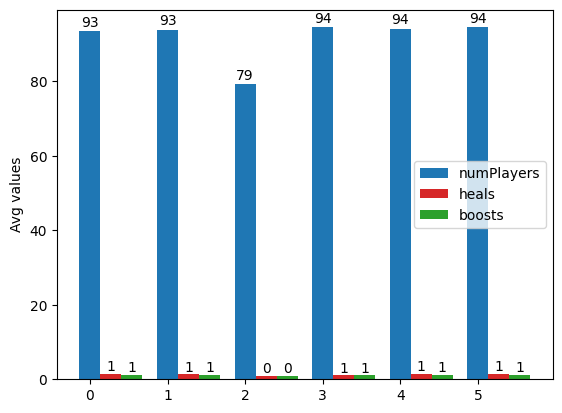

In [80]:
ax = plt.subplot()
width = 0.27

rect1 = ax.bar(x = x_placeholders, height = retrieved_data["numPlayers"], width=width, color = "#1f77b4", align="center")
rect2 = ax.bar(x = x_placeholders+width, height = retrieved_data["heals"], width=width, color = "#d62728", align="center")
rect3 = ax.bar(x = x_placeholders+2*width, height = retrieved_data["boosts"], width=width, color = "#2ca02c", align="center")

ax.set_ylabel('Avg values')

ax.legend( (rect1[0], rect2[0], rect3[0]), ('numPlayers', 'heals', 'boosts'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.savefig("./plots/avg_standard_values_per_gametype2.png")

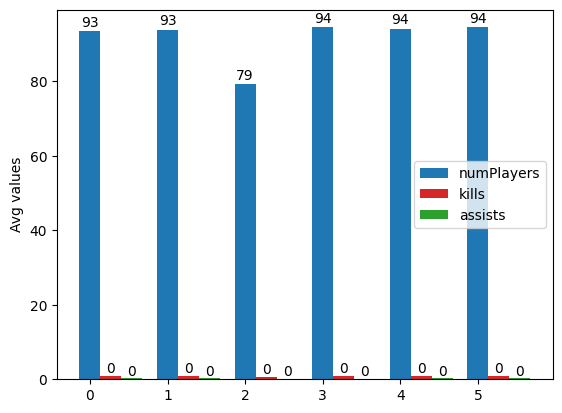

In [81]:
ax = plt.subplot()
width = 0.27

rect1 = ax.bar(x = x_placeholders, height = retrieved_data["numPlayers"], width=width, color = "#1f77b4", align="center")
rect2 = ax.bar(x = x_placeholders+width, height = retrieved_data["kills"], width=width, color = "#d62728", align="center")
rect3 = ax.bar(x = x_placeholders+2*width, height = retrieved_data["assists"], width=width, color = "#2ca02c", align="center")

ax.set_ylabel('Avg values')

ax.legend( (rect1[0], rect2[0], rect3[0]), ('numPlayers', 'kills', 'assists'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.savefig("./plots/avg_standard_values_per_gametype3.png")

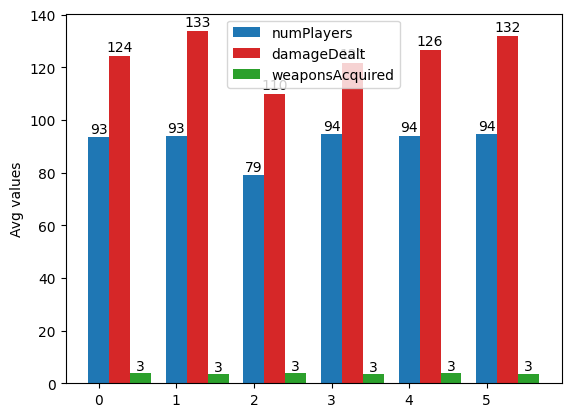

In [82]:
ax = plt.subplot()
width = 0.27

rect1 = ax.bar(x = x_placeholders, height = retrieved_data["numPlayers"], width=width, color = "#1f77b4", align="center")
rect2 = ax.bar(x = x_placeholders+width, height = retrieved_data["damageDealt"], width=width, color = "#d62728", align="center")
rect3 = ax.bar(x = x_placeholders+2*width, height = retrieved_data["weaponsAcquired"], width=width, color = "#2ca02c", align="center")

ax.set_ylabel('Avg values')

ax.legend( (rect1[0], rect2[0], rect3[0]), ('numPlayers', 'damageDealt', 'weaponsAcquired'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.savefig("./plots/avg_standard_values_per_gametype4.png")

# Data of alternative game modes

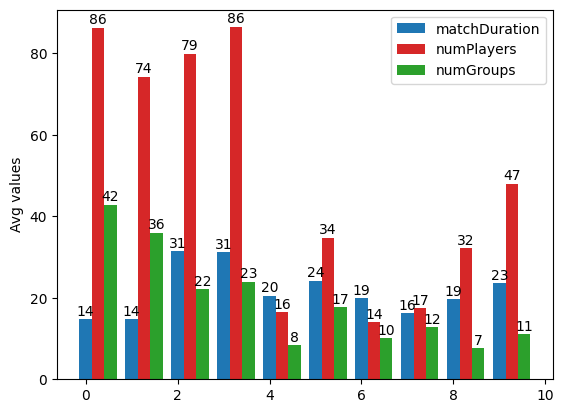

In [83]:
import numpy as np

retrieved_data = {
                "matchId": "",
                "matchDuration": [],
                "numPlayers": [],
                "numGroups": [],
                "damageDealt": [],
                "kills":[],
                "assists": [],
                "boosts": [],
                "heals": [],
                "weaponsAcquired":[]
                }
keys = []
for key in avgs_alt:
    game_data = avgs[key]
    for k in retrieved_data:
        if k != "matchId":
            retrieved_data[k].append(game_data[k])

x_placeholders = np.arange(len(match_types_alternative))
ax = plt.subplot()
width = 0.27

rect1 = ax.bar(x = x_placeholders, height = retrieved_data["matchDuration"], width=width, color = "#1f77b4", align="center")
rect2 = ax.bar(x = x_placeholders+width, height = retrieved_data["numPlayers"], width=width, color = "#d62728", align="center")
rect3 = ax.bar(x = x_placeholders+2*width, height = retrieved_data["numGroups"], width=width, color = "#2ca02c", align="center")

ax.set_ylabel('Avg values')

ax.legend( (rect1[0], rect2[0], rect3[0]), ('matchDuration', 'numPlayers', 'numGroups'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.savefig("./plots/avg_alternative_values_per_gametype.png")

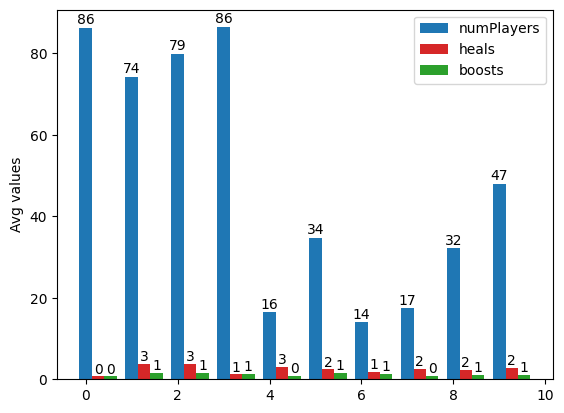

In [84]:
ax = plt.subplot()
width = 0.27

rect1 = ax.bar(x = x_placeholders, height = retrieved_data["numPlayers"], width=width, color = "#1f77b4", align="center")
rect2 = ax.bar(x = x_placeholders+width, height = retrieved_data["heals"], width=width, color = "#d62728", align="center")
rect3 = ax.bar(x = x_placeholders+2*width, height = retrieved_data["boosts"], width=width, color = "#2ca02c", align="center")

ax.set_ylabel('Avg values')

ax.legend( (rect1[0], rect2[0], rect3[0]), ('numPlayers', 'heals', 'boosts'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.savefig("./plots/avg_alternative_values_per_gametype2.png")

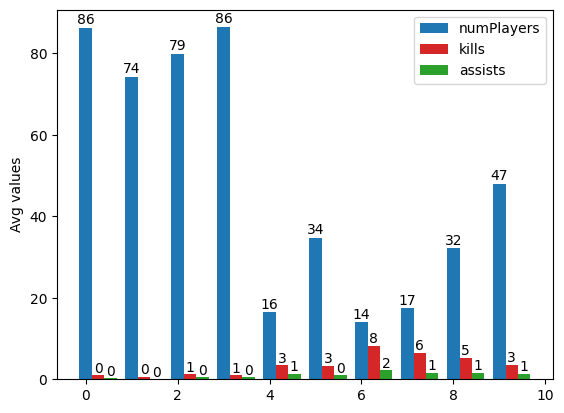

In [85]:
ax = plt.subplot()
width = 0.27

rect1 = ax.bar(x = x_placeholders, height = retrieved_data["numPlayers"], width=width, color = "#1f77b4", align="center")
rect2 = ax.bar(x = x_placeholders+width, height = retrieved_data["kills"], width=width, color = "#d62728", align="center")
rect3 = ax.bar(x = x_placeholders+2*width, height = retrieved_data["assists"], width=width, color = "#2ca02c", align="center")

ax.set_ylabel('Avg values')

ax.legend( (rect1[0], rect2[0], rect3[0]), ('numPlayers', 'kills', 'assists'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.savefig("./plots/avg_alternative_values_per_gametype3.png")

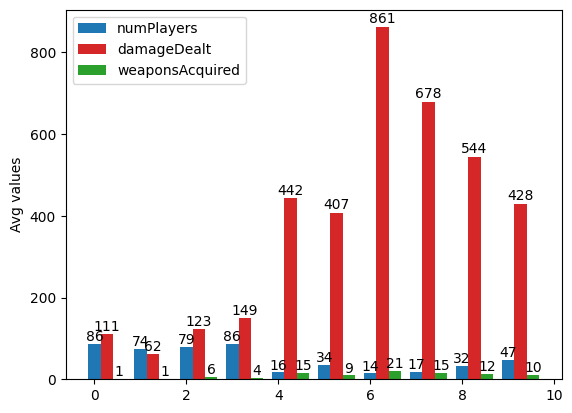

In [86]:
ax = plt.subplot()
width = 0.27

rect1 = ax.bar(x = x_placeholders, height = retrieved_data["numPlayers"], width=width, color = "#1f77b4", align="center")
rect2 = ax.bar(x = x_placeholders+width, height = retrieved_data["damageDealt"], width=width, color = "#d62728", align="center")
rect3 = ax.bar(x = x_placeholders+2*width, height = retrieved_data["weaponsAcquired"], width=width, color = "#2ca02c", align="center")

ax.set_ylabel('Avg values')

ax.legend( (rect1[0], rect2[0], rect3[0]), ('numPlayers', 'damageDealt', 'weaponsAcquired'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.savefig("./plots/avg_alternative_values_per_gametype4.png")